### `Import Libraries`

In [1]:
import pandas as pd
import numpy as np 
import sys
import os
import datetime
import scipy.stats as sp 
import pymannkendall as ml
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import seaborn as sns
import warnings 
from scipy.signal import find_peaks
from tsfresh import extract_features
from IPython.display import display, HTML 
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### `Sample Data`

Length of data :  24
[1, 3, 6, 2, 5, 12, 14, 6, 5, 3, 2, 1, 1, 3, 6, 2, 5, 12, 14, 6, 5, 3, 2, 1]


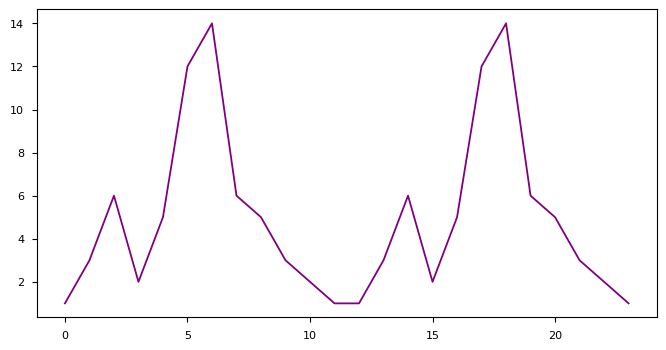

In [3]:
##### Sample Data 
data = pd.Series([1,3,6,2,5,12,14,6,5,3,2,1,
                1,3,6,2,5,12,14,6,5,3,2,1]
                )
print("Length of data : ", len(data))
print(data.tolist())

##### Plotting
plt.style.use("seaborn-paper")
fig, axes = plt.subplots(1, 1, figsize=(8, 4), dpi=100)
data.plot(ax=axes, linestyle="-", linewidth=1.3, color="purple", label="Value")
# plt.legend()
plt.show()

### `Sample Data With Datetime`

In [6]:
# starttime = datetime.datetime.strptime("2022-01-01 00:00:00.123000", "%Y-%m-%d %H:%M:%S.%f")
# endtime = datetime.datetime.strptime("2022-01-06 00:00:00.123000", "%Y-%m-%d %H:%M:%S.%f")

starttime = datetime.datetime.strptime("2022-01-01", "%Y-%m-%d")
endtime = datetime.datetime.strptime("2022-01-06", "%Y-%m-%d")

time_diff = endtime - starttime 
print(f"Starttime : {starttime}")
print(f"Endtime : {endtime}")
print(f"Time Diff : {time_diff}")

# time_diff_secs = time_diff.seconds
time_diff_secs = int(time_diff.total_seconds())
print(f"Time Diff Secs : {time_diff_secs}")

# time_diff_milli_secs = time_diff_secs * 24
# datetime_list = [starttime + datetime.datetime.timedelta(milliseconds=1*x) for x in range(0, time_diff_milli_secs)]
# datetime_list = [starttime + datetime.timedelta(milliseconds=1*x) for x in range(0, 24)] # Sample data values
datetime_list = [starttime + datetime.timedelta(days=1*x) for x in range(0, 24)] # Sample data values
print("Datetime List : ")
print(datetime_list)

Starttime : 2022-01-01 00:00:00
Endtime : 2022-01-06 00:00:00
Time Diff : 5 days, 0:00:00
Time Diff Secs : 432000
Datetime List : 
[datetime.datetime(2022, 1, 1, 0, 0), datetime.datetime(2022, 1, 2, 0, 0), datetime.datetime(2022, 1, 3, 0, 0), datetime.datetime(2022, 1, 4, 0, 0), datetime.datetime(2022, 1, 5, 0, 0), datetime.datetime(2022, 1, 6, 0, 0), datetime.datetime(2022, 1, 7, 0, 0), datetime.datetime(2022, 1, 8, 0, 0), datetime.datetime(2022, 1, 9, 0, 0), datetime.datetime(2022, 1, 10, 0, 0), datetime.datetime(2022, 1, 11, 0, 0), datetime.datetime(2022, 1, 12, 0, 0), datetime.datetime(2022, 1, 13, 0, 0), datetime.datetime(2022, 1, 14, 0, 0), datetime.datetime(2022, 1, 15, 0, 0), datetime.datetime(2022, 1, 16, 0, 0), datetime.datetime(2022, 1, 17, 0, 0), datetime.datetime(2022, 1, 18, 0, 0), datetime.datetime(2022, 1, 19, 0, 0), datetime.datetime(2022, 1, 20, 0, 0), datetime.datetime(2022, 1, 21, 0, 0), datetime.datetime(2022, 1, 22, 0, 0), datetime.datetime(2022, 1, 23, 0, 0), dat

### `Final Data`

In [7]:
df = pd.DataFrame({"Datetime":datetime_list,
                    "Values":data
                    })
df.index = range(len(df))
df["ID"] = df.index

print(df.info())
print(df.head(2))
print(df.tail(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  24 non-null     datetime64[ns]
 1   Values    24 non-null     int64         
 2   ID        24 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 704.0 bytes
None
    Datetime  Values  ID
0 2022-01-01       1   0
1 2022-01-02       3   1
     Datetime  Values  ID
22 2022-01-23       2  22
23 2022-01-24       1  23


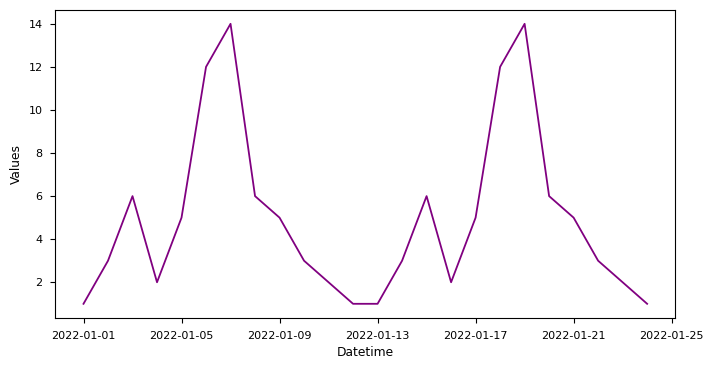

In [8]:
##### Plotting
plt.style.use("seaborn-paper")
fig, axes = plt.subplots(1, 1, figsize=(8, 4), dpi=100)
# df.plot(x="Datetime", y="Values", 
#         ax=axes, linestyle="-", 
#         linewidth=1.3, color="purple"
#         )
sns.lineplot(x="Datetime", y="Values", data=df, ax=axes, linestyle="-", linewidth=1.3, color="purple")
# plt.legend()
plt.show()

### `Features Extraction - Tsfresh`

In [9]:
print(df.head(2))
print(df.tail(2))

    Datetime  Values  ID
0 2022-01-01       1   0
1 2022-01-02       3   1
     Datetime  Values  ID
22 2022-01-23       2  22
23 2022-01-24       1  23


In [10]:
# df_timeseries_features = extract_features(df, column_id="Datetime", column_sort="Datetime")
df_timeseries_features = extract_features(df, column_id="ID", column_sort="Datetime")

Feature Extraction: 100%|██████████| 8/8 [00:00<00:00,  9.97it/s]


In [11]:
df_timeseries_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Columns: 789 entries, Values__variance_larger_than_standard_deviation to Values__mean_n_absolute_max__number_of_maxima_7
dtypes: float64(789)
memory usage: 148.1 KB


In [12]:
display(HTML(df_timeseries_features.head(2).to_html()))

,Values__variance_larger_than_standard_deviation,Values__has_duplicate_max,Values__has_duplicate_min,Values__has_duplicate,Values__sum_values,Values__abs_energy,Values__mean_abs_change,Values__mean_change,Values__mean_second_derivative_central,Values__median,Values__mean,Values__length,Values__standard_deviation,Values__variation_coefficient,Values__variance,Values__skewness,Values__kurtosis,Values__root_mean_square,Values__absolute_sum_of_changes,Values__longest_strike_below_mean,Values__longest_strike_above_mean,Values__count_above_mean,Values__count_below_mean,Values__last_location_of_maximum,Values__first_location_of_maximum,Values__last_location_of_minimum,Values__first_location_of_minimum,Values__percentage_of_reoccurring_values_to_all_values,Values__percentage_of_reoccurring_datapoints_to_all_datapoints,Values__sum_of_reoccurring_values,Values__sum_of_reoccurring_data_points,Values__ratio_value_number_to_time_series_length,Values__sample_entropy,Values__maximum,Values__absolute_maximum,Values__minimum,Values__benford_correlation,Values__time_reversal_asymmetry_statistic__lag_1,Values__time_reversal_asymmetry_statistic__lag_2,Values__time_reversal_asymmetry_statistic__lag_3,Values__c3__lag_1,Values__c3__lag_2,Values__c3__lag_3,Values__cid_ce__normalize_True,Values__cid_ce__normalize_False,Values__symmetry_looking__r_0.0,Values__symmetry_looking__r_0.05,Values__symmetry_looking__r_0.1,Values__symmetry_looking__r_0.15000000000000002,Values__symmetry_looking__r_0.2,Values__symmetry_looking__r_0.25,Values__symmetry_looking__r_0.30000000000000004,Values__symmetry_looking__r_0.35000000000000003,Values__symmetry_looking__r_0.4,Values__symmetry_looking__r_0.45,Values__symmetry_looking__r_0.5,Values__symmetry_looking__r_0.55,Values__symmetry_looking__r_0.6000000000000001,Values__symmetry_looking__r_0.65,Values__symmetry_looking__r_0.7000000000000001,Values__symmetry_looking__r_0.75,Values__symmetry_looking__r_0.8,Values__symmetry_looking__r_0.8500000000000001,Values__symmetry_looking__r_0.9,Values__symmetry_looking__r_0.9500000000000001,Values__large_standard_deviation__r_0.05,Values__large_standard_deviation__r_0.1,Values__large_standard_deviation__r_0.15000000000000002,Values__large_standard_deviation__r_0.2,Values__large_standard_deviation__r_0.25,Values__large_standard_deviation__r_0.30000000000000004,Values__large_standard_deviation__r_0.35000000000000003,Values__large_standard_deviation__r_0.4,Values__large_standard_deviation__r_0.45,Values__large_standard_deviation__r_0.5,Values__large_standard_deviation__r_0.55,Values__large_standard_deviation__r_0.6000000000000001,Values__large_standard_deviation__r_0.65,Values__large_standard_deviation__r_0.7000000000000001,Values__large_standard_deviation__r_0.75,Values__large_standard_deviation__r_0.8,Values__large_standard_deviation__r_0.8500000000000001,Values__large_standard_deviation__r_0.9,Values__large_standard_deviation__r_0.9500000000000001,Values__quantile__q_0.1,Values__quantile__q_0.2,Values__quantile__q_0.3,Values__quantile__q_0.4,Values__quantile__q_0.6,Values__quantile__q_0.7,Values__quantile__q_0.8,Values__quantile__q_0.9,Values__autocorrelation__lag_0,Values__autocorrelation__lag_1,Values__autocorrelation__lag_2,Values__autocorrelation__lag_3,Values__autocorrelation__lag_4,Values__autocorrelation__lag_5,Values__autocorrelation__lag_6,Values__autocorrelation__lag_7,Values__autocorrelation__lag_8,Values__autocorrelation__lag_9,"Values__agg_autocorrelation__f_agg_""mean""__maxlag_40","Values__agg_autocorrelation__f_agg_""median""__maxlag_40","Values__agg_autocorrelation__f_agg_""var""__maxlag_40",Values__partial_autocorrelation__lag_0,Values__partial_autocorrelation__lag_1,Values__partial_autocorrelation__lag_2,Values__partial_autocorrelation__lag_3,Values__partial_autocorrelation__lag_4,Values__partial_autocorrelation__lag_5,Values__partial_autocorrelation__lag_6,Values__partial_autocorrelation__lag_7,Values__partial_autocorrelation__lag_8,Values__partial_autocorrelation

In [16]:
display(HTML(pd.melt(df_timeseries_features.head(1)).head(2).to_html()))
display(HTML(pd.melt(df_timeseries_features.head(1)).tail(2).to_html()))

,variable,value
0,Values__variance_larger_than_standard_deviation,0.0
1,Values__has_duplicate_max,0.0


,variable,value
787,"Values__matrix_profile__feature_""75""__threshold_0.98",NaN
788,Values__mean_n_absolute_max__number_of_maxima_7,NaN


### `Feature Engineered Cols`

In [20]:
print(df_timeseries_features.columns.tolist())

['Values__variance_larger_than_standard_deviation', 'Values__has_duplicate_max', 'Values__has_duplicate_min', 'Values__has_duplicate', 'Values__sum_values', 'Values__abs_energy', 'Values__mean_abs_change', 'Values__mean_change', 'Values__mean_second_derivative_central', 'Values__median', 'Values__mean', 'Values__length', 'Values__standard_deviation', 'Values__variation_coefficient', 'Values__variance', 'Values__skewness', 'Values__kurtosis', 'Values__root_mean_square', 'Values__absolute_sum_of_changes', 'Values__longest_strike_below_mean', 'Values__longest_strike_above_mean', 'Values__count_above_mean', 'Values__count_below_mean', 'Values__last_location_of_maximum', 'Values__first_location_of_maximum', 'Values__last_location_of_minimum', 'Values__first_location_of_minimum', 'Values__percentage_of_reoccurring_values_to_all_values', 'Values__percentage_of_reoccurring_datapoints_to_all_datapoints', 'Values__sum_of_reoccurring_values', 'Values__sum_of_reoccurring_data_points', 'Values__rat

### `Key Featured Columns`

In [21]:
fe_cols = ['Values__variance_larger_than_standard_deviation', 'Values__has_duplicate_max', 
        'Values__has_duplicate_min', 'Values__has_duplicate', 'Values__sum_values', 
        'Values__abs_energy', 'Values__mean_abs_change', 'Values__mean_change', 
        'Values__mean_second_derivative_central', 'Values__median', 'Values__mean', 
        'Values__length', 'Values__standard_deviation', 'Values__variation_coefficient', 
        'Values__variance', 'Values__skewness', 'Values__kurtosis', 'Values__root_mean_square', 
        'Values__absolute_sum_of_changes']

### `Filtering FE Cols`

In [22]:
df_timeseries_final = df_timeseries_features.loc[:,fe_cols].copy(deep=True)

display(HTML(df_timeseries_final.head(2).to_html()))
display(HTML(df_timeseries_final.tail(2).to_html()))

,Values__variance_larger_than_standard_deviation,Values__has_duplicate_max,Values__has_duplicate_min,Values__has_duplicate,Values__sum_values,Values__abs_energy,Values__mean_abs_change,Values__mean_change,Values__mean_second_derivative_central,Values__median,Values__mean,Values__length,Values__standard_deviation,Values__variation_coefficient,Values__variance,Values__skewness,Values__kurtosis,Values__root_mean_square,Values__absolute_sum_of_changes
0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0
1,0.0,0.0,0.0,0.0,3.0,9.0,NaN,NaN,NaN,3.0,3.0,1.0,0.0,0.0,0.0,NaN,NaN,3.0,0.0


,Values__variance_larger_than_standard_deviation,Values__has_duplicate_max,Values__has_duplicate_min,Values__has_duplicate,Values__sum_values,Values__abs_energy,Values__mean_abs_change,Values__mean_change,Values__mean_second_derivative_central,Values__median,Values__mean,Values__length,Values__standard_deviation,Values__variation_coefficient,Values__variance,Values__skewness,Values__kurtosis,Values__root_mean_square,Values__absolute_sum_of_changes
22,0.0,0.0,0.0,0.0,2.0,4.0,NaN,NaN,NaN,2.0,2.0,1.0,0.0,0.0,0.0,NaN,NaN,2.0,0.0
23,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0


### `Appending Original Data At 0th location`

In [23]:
df_timeseries_final.insert(0, "Raw_Values", df.Values.tolist())
df_timeseries_final.insert(0, "Raw_Values", df.Values.tolist())

In [30]:
display(HTML(df_timeseries_final.head(5).to_html()))
display(HTML(df_timeseries_final.tail(5).to_html()))

,Raw_Values,Values__variance_larger_than_standard_deviation,Values__has_duplicate_max,Values__has_duplicate_min,Values__has_duplicate,Values__sum_values,Values__abs_energy,Values__mean_abs_change,Values__mean_change,Values__mean_second_derivative_central,Values__median,Values__mean,Values__length,Values__standard_deviation,Values__variation_coefficient,Values__variance,Values__skewness,Values__kurtosis,Values__root_mean_square,Values__absolute_sum_of_changes
0,1,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0
1,3,0.0,0.0,0.0,0.0,3.0,9.0,NaN,NaN,NaN,3.0,3.0,1.0,0.0,0.0,0.0,NaN,NaN,3.0,0.0
2,6,0.0,0.0,0.0,0.0,6.0,36.0,NaN,NaN,NaN,6.0,6.0,1.0,0.0,0.0,0.0,NaN,NaN,6.0,0.0
3,2,0.0,0.0,0.0,0.0,2.0,4.0,NaN,NaN,NaN,2.0,2.0,1.0,0.0,0.0,0.0,NaN,NaN,2.0,0.0
4,5,0.0,0.0,0.0,0.0,5.0,25.0,NaN,NaN,NaN,5.0,5.0,1.0,0.0,0.0,0.0,NaN,NaN,5.0,0.0


,Raw_Values,Values__variance_larger_than_standard_deviation,Values__has_duplicate_max,Values__has_duplicate_min,Values__has_duplicate,Values__sum_values,Values__abs_energy,Values__mean_abs_change,Values__mean_change,Values__mean_second_derivative_central,Values__median,Values__mean,Values__length,Values__standard_deviation,Values__variation_coefficient,Values__variance,Values__skewness,Values__kurtosis,Values__root_mean_square,Values__absolute_sum_of_changes
19,6,0.0,0.0,0.0,0.0,6.0,36.0,NaN,NaN,NaN,6.0,6.0,1.0,0.0,0.0,0.0,NaN,NaN,6.0,0.0
20,5,0.0,0.0,0.0,0.0,5.0,25.0,NaN,NaN,NaN,5.0,5.0,1.0,0.0,0.0,0.0,NaN,NaN,5.0,0.0
21,3,0.0,0.0,0.0,0.0,3.0,9.0,NaN,NaN,NaN,3.0,3.0,1.0,0.0,0.0,0.0,NaN,NaN,3.0,0.0
22,2,0.0,0.0,0.0,0.0,2.0,4.0,NaN,NaN,NaN,2.0,2.0,1.0,0.0,0.0,0.0,NaN,NaN,2.0,0.0
23,1,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0


### `Visualise Raw Values`

In [26]:
df_timeseries_final.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')

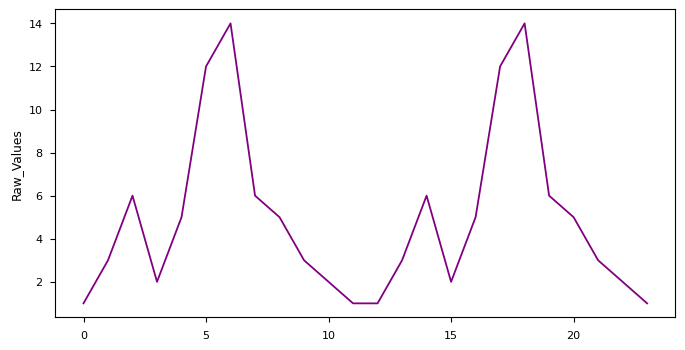

In [27]:
##### Plotting
plt.style.use("seaborn-paper")
fig, axes = plt.subplots(1, 1, figsize=(8, 4), dpi=100)
sns.lineplot(x=df_timeseries_final.index, 
            y=df_timeseries_final.Raw_Values, 
            ax=axes, linestyle="-", linewidth=1.3, 
            color="purple")
plt.show()

### `Visualise All FE Cols`

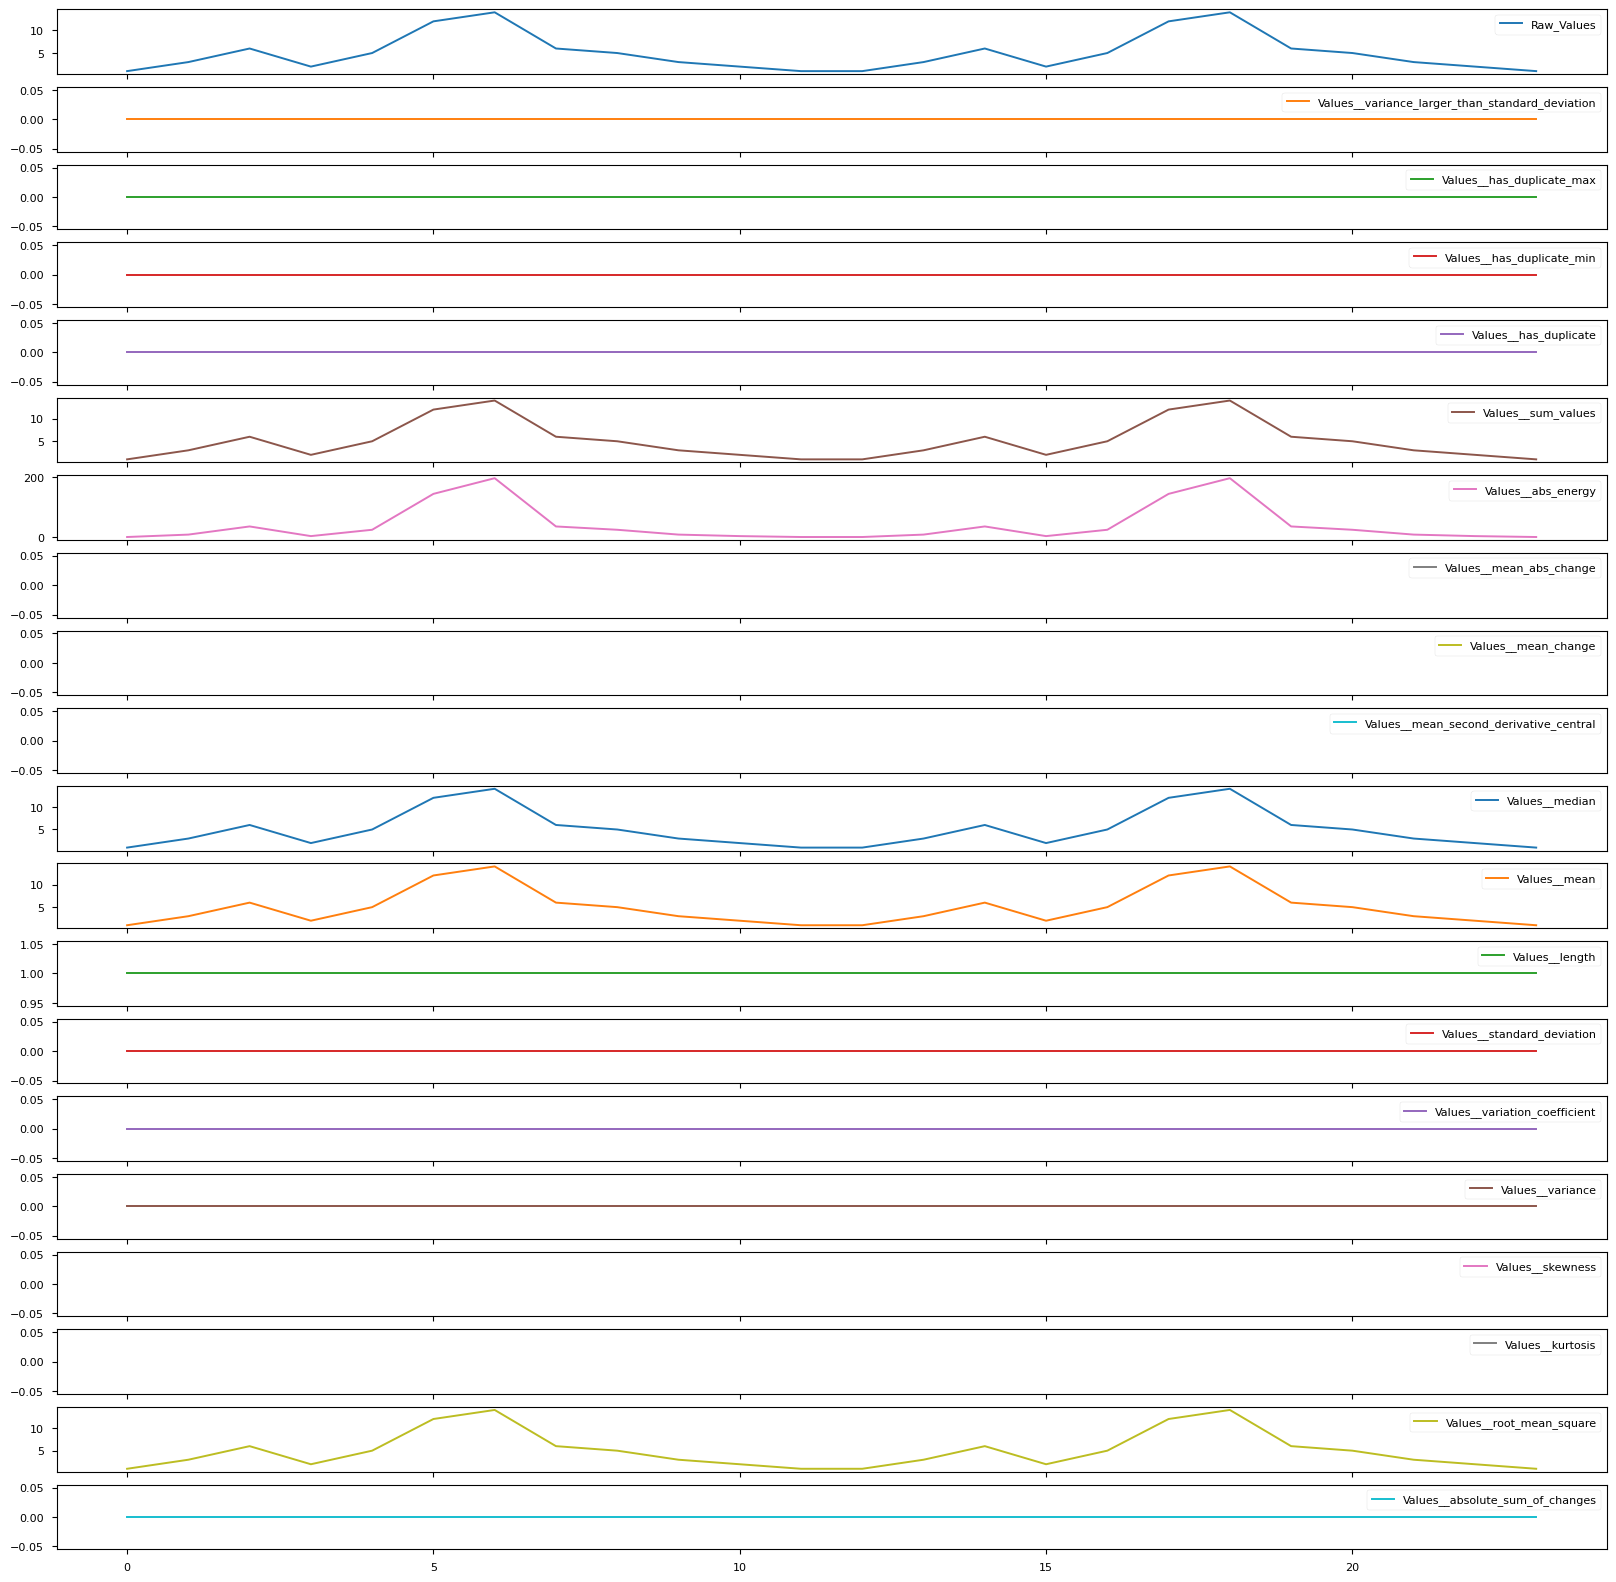

In [29]:
df_timeseries_final.plot(subplots=True, sharex=True, figsize=(20,20))
plt.show()